# **Predictive Modeling For Car Insurance Claim**


<img src='https://images.ratecity.com.au/large/20230110/car-insurance-claim-tips-yvQ3tS35w.jpg'>

# ===============================================
###     **BUSINESS PROBLEM STATEMENT:**
# ===============================================
Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.

# System Dependencies

In [1]:
print('python=',sys.version)
print('pandas=',pd. __version__) 
print('numpy=',np. __version__) 
print('Scikit- learn=',sklearn. __version__) 
print('Flask=','2.2.2')
print('Pickle= ',  '23.3.2')
#!pip show flask

<IPython.core.display.Javascript object>

python= 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


<IPython.core.display.Javascript object>

pandas= 2.0.3


<IPython.core.display.Javascript object>

numpy= 1.23.5


<IPython.core.display.Javascript object>

Scikit- learn= 1.3.0
Flask= 2.2.2
Pickle=  23.3.2


# Importing Libraries

In [1]:
import pyforest

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
df = pd.read_csv('Insurance_Data.csv')
df.head()

<IPython.core.display.Javascript object>

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


# Data Exploration

## 1. Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
#checking duplicated records
print(f'Checking duplicated values: {df.duplicated().sum()}')

Checking duplicated values: 0


In [6]:
#Checking data type,unique value counts, null count
col_info=pd.DataFrame()
col_info['columns']= df.dtypes.index.tolist()
col_info['dtypes'] = df.dtypes.values.tolist()
col_info['unique_count'] = df.nunique().tolist()
for col in df.columns:
    col_info['null_count'] = df[col].isna().sum()

col_info.head(10)

<IPython.core.display.Javascript object>

,columns,dtypes,unique_count,null_count
0,policy_id,object,58592,0
1,policy_tenure,float64,58592,0
2,age_of_car,float64,49,0
3,age_of_policyholder,float64,75,0
4,area_cluster,object,22,0
5,population_density,int64,22,0
6,make,int64,5,0
7,segment,object,6,0
8,model,object,11,0
9,fuel_type,object,3,0


In [7]:
numeric_columns = df.select_dtypes(include=['number'])
object_columns = df.select_dtypes(exclude=['number'])
num_col= numeric_columns.columns.tolist()
obj_col = object_columns.columns.tolist()
print(f'Numeric Columns {len(num_col)} :',num_col)
print()
print(f'Object Columns {len(obj_col)}:',obj_col)

Numeric Columns 16 : ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']

Object Columns 28: ['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


<Axes: >

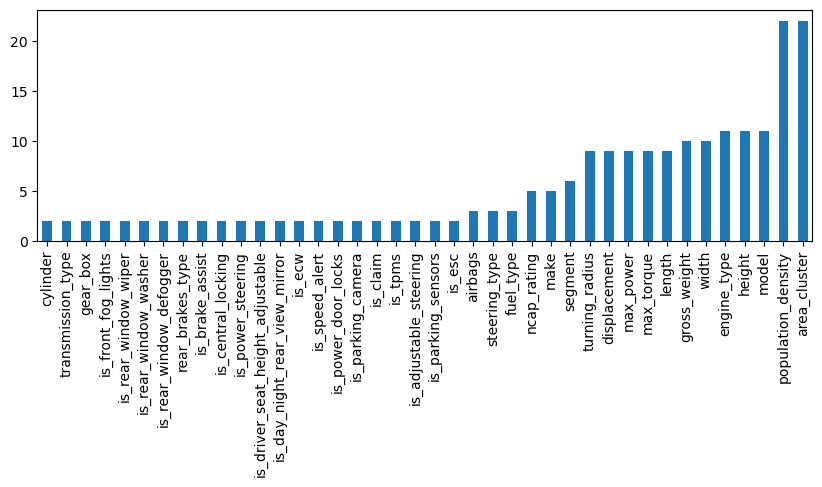

In [8]:
unique_counts = df.nunique().sort_values()[:40]
unique_counts.plot(kind='bar',figsize=(10,3))

<Axes: >

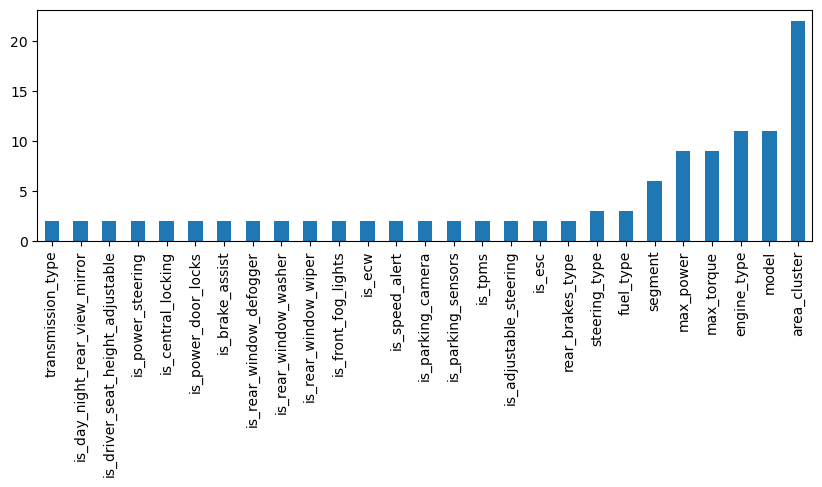

In [9]:
unique_counts_obj = object_columns.iloc[:,1:].nunique().sort_values()
unique_counts_obj.plot(kind='bar',figsize=(10,3))

In [10]:
for col in num_col:
        
    if df[col].nunique()<20:
        print('==='*10)
        print(col, df[col].unique())
        print('==='*10)
    

make [1 2 3 4 5]
airbags [2 6 1]
displacement [ 796 1197  999 1493 1497  998 1498 1196 1199]
cylinder [3 4]
gear_box [5 6]
turning_radius [4.6  4.8  5.   5.2  4.85 4.7  4.9  4.5  5.1 ]
length [3445 3995 3731 4300 3990 3845 3655 3675 3993]
width [1515 1735 1579 1790 1755 1745 1620 1695 1475 1811]
height [1475 1515 1490 1635 1523 1530 1500 1675 1501 1825 1606]
gross_weight [1185 1335 1155 1720 1490 1410 1340 1051 1510 1660]
ncap_rating [0 2 3 5 4]
is_claim [0 1]


In [11]:
for col in obj_col:
    
    if df[col].nunique()>2:
        print('==='*10)
        print(col, df[col].unique())
        print('==='*10)
    

policy_id ['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
area_cluster ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
segment ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
model ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
fuel_type ['CNG' 'Petrol' 'Diesel']
max_torque ['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
max_power ['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
engine_type ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
steering_type ['Power' 'Electric' 'Manual']


# Target Feature

is_claim
0    54844
1     3748
Name: count, dtype: int64
is_claim
0    93.603222
1     6.396778
Name: count, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

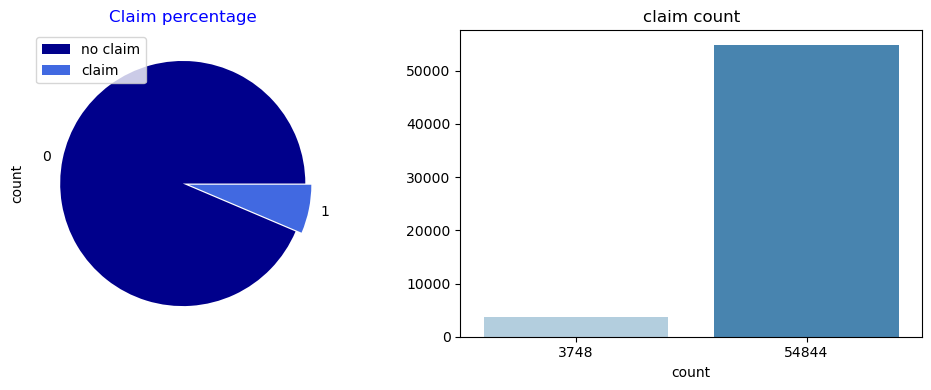

In [12]:
claim_counts = df.is_claim.value_counts()
percentages = (claim_counts / len(df)) * 100
print(claim_counts)
print(percentages)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
claim_counts.plot(kind='pie', explode=(0,0.05), colors=['darkblue','royalblue'])
plt.title('Claim percentage', color ='blue')
plt.legend(['no claim','claim'])
plt.subplot(1,2,2)
sns.barplot(x=claim_counts.index,y=claim_counts.values, data = claim_counts, palette='Blues' )
plt.title('claim count')
plt.tight_layout()
plt.show()

In [13]:
claim_counts.values

array([54844,  3748], dtype=int64)

# Univariate Statistics:

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [15]:
df.describe(exclude='number').T

,count,unique,top,freq
policy_id,58592,58592,ID00001,1
area_cluster,58592,22,C8,13654
segment,58592,6,B2,18314
model,58592,11,M1,14948
fuel_type,58592,3,Petrol,20532
max_torque,58592,9,113Nm@4400rpm,17796
max_power,58592,9,88.50bhp@6000rpm,17796
engine_type,58592,11,F8D Petrol Engine,14948
is_esc,58592,2,No,40191
is_adjustable_steering,58592,2,Yes,35526


In [16]:
claim = df[df.is_claim ==1]
non_claim = df[df.is_claim==0]

# Exploratory Data Analysis (EDA)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

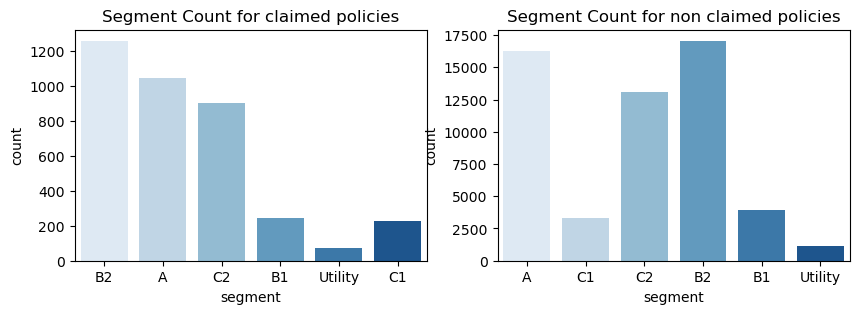

In [17]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(x='segment', data = claim, palette ='Blues',)
plt.title('Segment Count for claimed policies')
plt.subplot(1,2,2)
sns.countplot(x='segment', data = non_claim, palette ='Blues',)
plt.title('Segment Count for non claimed policies')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

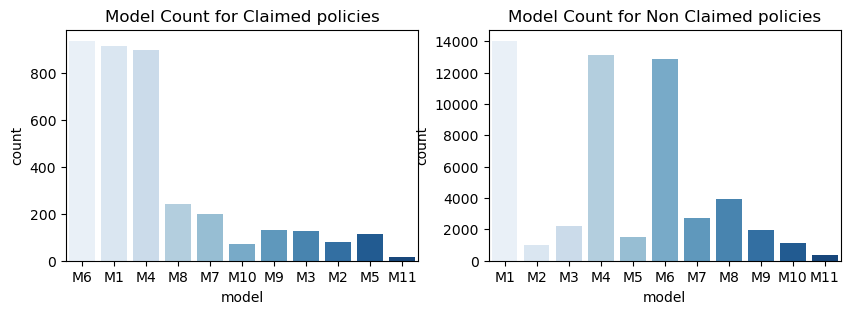

In [18]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(x='model', data = claim, palette ='Blues',)
plt.title('Model Count for Claimed policies')
plt.subplot(1,2,2)
sns.countplot(x='model', data = non_claim, palette ='Blues',)
plt.title('Model Count for Non Claimed policies')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

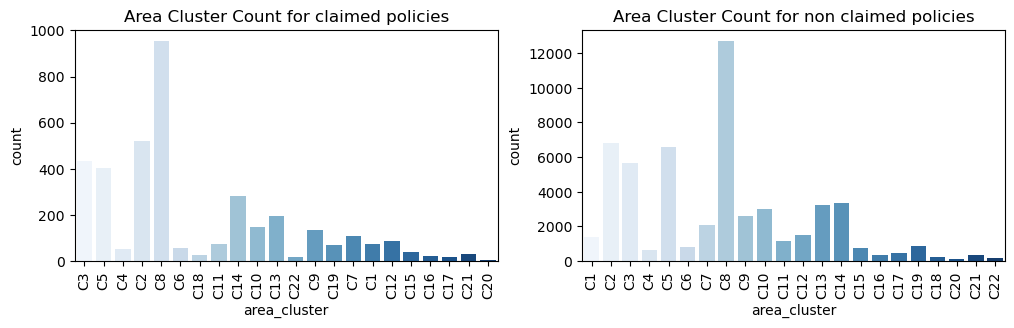

In [19]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.countplot(x='area_cluster', data = claim, palette ='Blues',)
plt.title('Area Cluster Count for claimed policies')
plt.xticks(rotation =90)
plt.subplot(1,2,2)
sns.countplot(x='area_cluster', data = non_claim, palette ='Blues',)
plt.title('Area Cluster Count for non claimed policies')
plt.xticks(rotation =90)
plt.show()

In [20]:
def num_dist(df,col,target='is_claim'):
    plt.figure(figsize=(18,4))
    plt.subplot(1,4,1)    
    sns.boxplot(data=df, x=target,y=col, palette= 'tab20', )
    plt.title(f'{col} vs {target}')
    
    plt.subplot(1,4,2)    
    sns.violinplot(data=df, x=target,y=col, palette= 'tab20', )
    plt.title(f'{col} vs {target}')
    
    plt.subplot(1,4,3)    
    sns.kdeplot(data=df, x=col, palette= 'tab20', hue = target  )
    plt.title(f'Distribution of of {col}')
    
    
    #plt.legend(labels=['claimed','not claimed'])
    plt.tight_layout
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

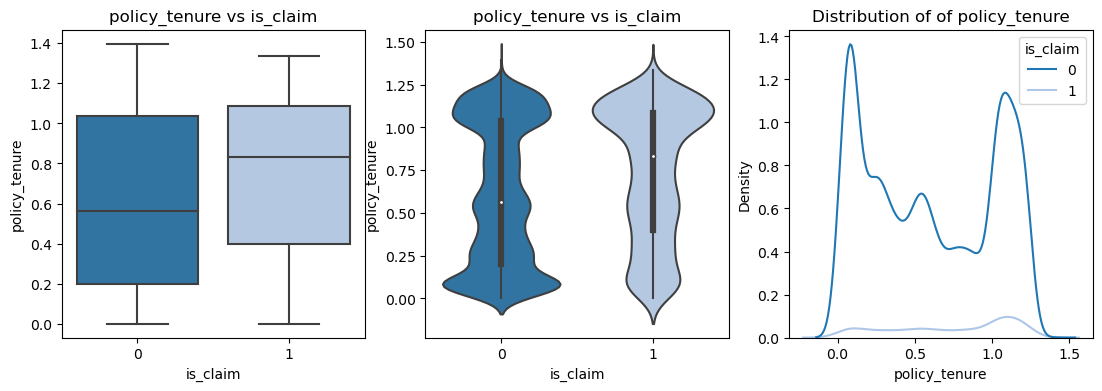

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

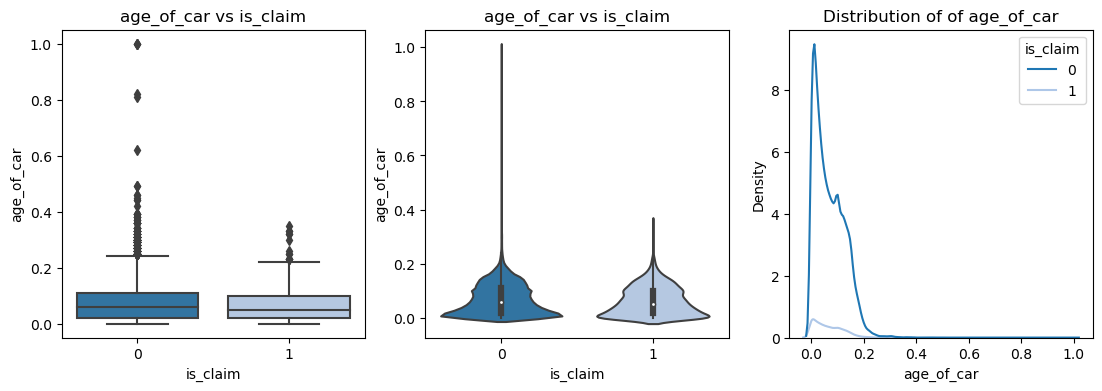

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

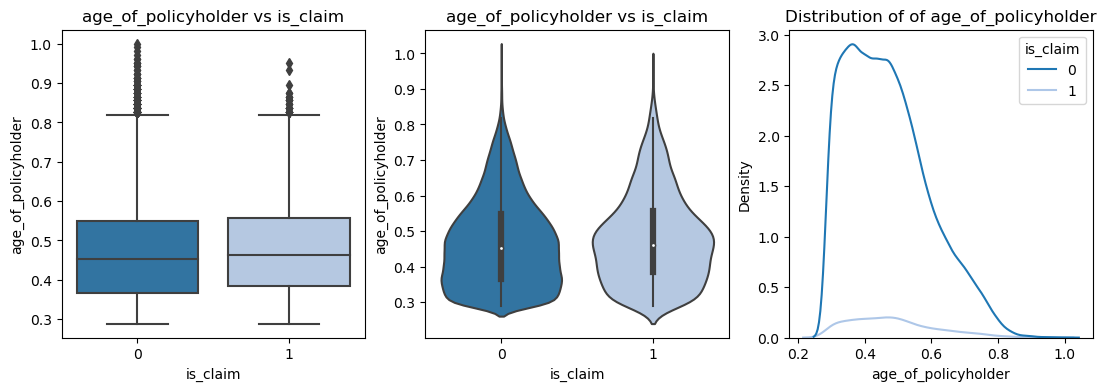

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

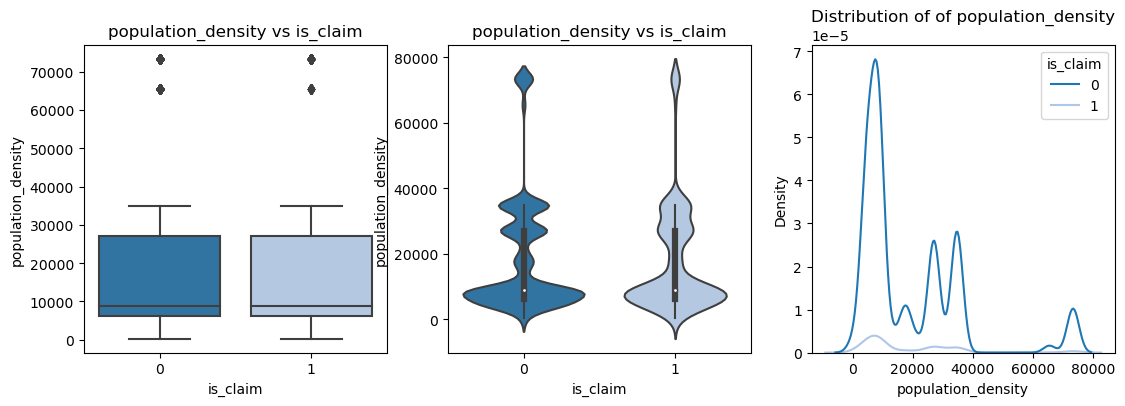

In [21]:
for col in num_col[:-1]:
    if df[col].nunique() > 15:
        num_dist(df,col)

In [22]:
def plot_histplot(df,col,hue):
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, bins=60, kde=True, 
                 palette= 'magma', edgecolor='black', 
                 hue = hue ,legend= True )

    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimate of {col}')
    #plt.legend(labels=['claimed','not claimed'])
    plt.tight_layout
    plt.show()

In [23]:
cat_col =[]
for col in df.iloc[:,:-1].columns:
    if df[col].nunique()<=10 or df[col].dtype =='object':
        cat_col.append((col,df[col].nunique()))
cat_col
cat2= [ col for col, value in cat_col if value ==2]
cat_2_5 = [ col for col, value in cat_col if value <= 5 and value>=2]
cat_5_10 = [ col for col, value in cat_col if value >= 5]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

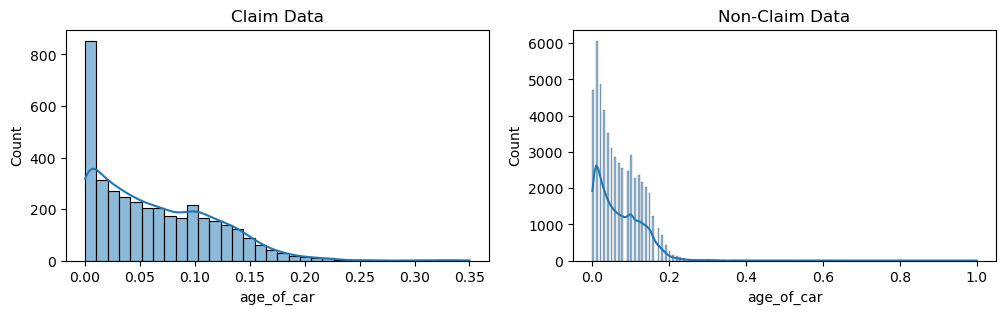

In [24]:
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
sns.histplot(data=claim, x='age_of_car', kde= True)  # Assuming you have a function called plot_histplot
plt.title('Claim Data')

plt.subplot(1, 2, 2)
sns.histplot(data=non_claim, x='age_of_car', kde= True)  # Assuming you have a function called plot_histplot
plt.title('Non-Claim Data')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

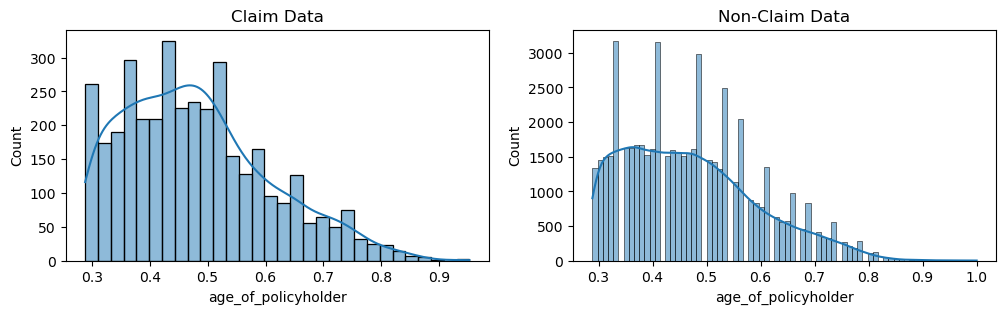

In [25]:
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
sns.histplot(data=claim, x='age_of_policyholder', kde= True)  # Assuming you have a function called plot_histplot
plt.title('Claim Data')

plt.subplot(1, 2, 2)
sns.histplot(data=non_claim, x='age_of_policyholder', kde= True)  # Assuming you have a function called plot_histplot
plt.title('Non-Claim Data')
plt.show()

# Bivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

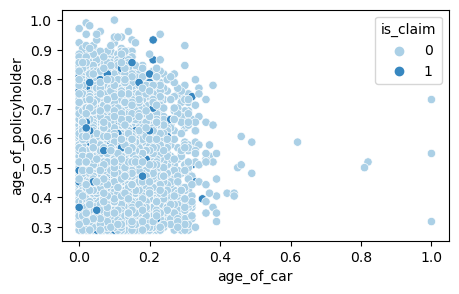

In [26]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='age_of_car', y='age_of_policyholder', hue='is_claim', data =df, palette ='Blues')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

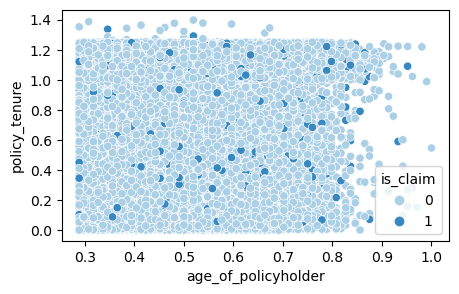

In [27]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='age_of_policyholder', y='policy_tenure', hue='is_claim', data =df, palette ='Blues')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

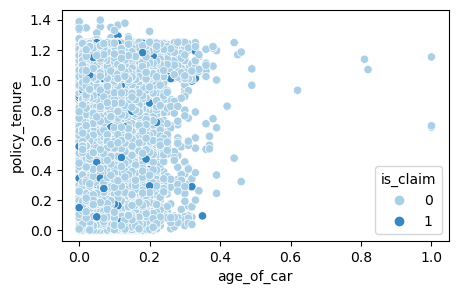

In [28]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='age_of_car', y='policy_tenure', hue='is_claim', data =df, palette ='Blues')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

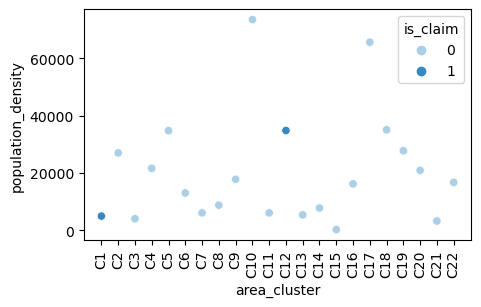

In [29]:
plt.figure(figsize=(5,3))
sns.scatterplot(y='population_density', x='area_cluster', hue='is_claim', data =df, palette ='Blues')
plt.xticks(rotation =90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

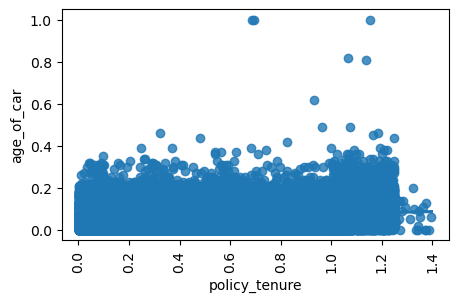

In [8]:
plt.figure(figsize=(5,3))
#sns.scatterplot(y='displacement', x='length', hue='is_claim', data =df, palette ='Blues')
sns.regplot(y='age_of_car', x='policy_tenure',  data =df, )
plt.xticks(rotation =90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

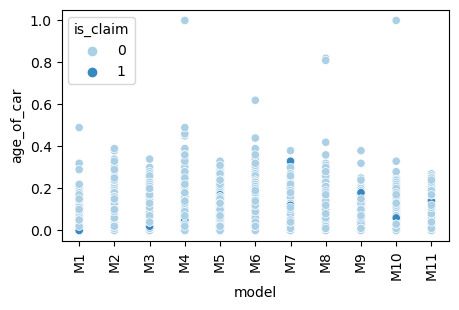

In [30]:
plt.figure(figsize=(5,3))
sns.scatterplot(y='age_of_car', x='model', hue='is_claim', data =df, palette ='Blues')
plt.xticks(rotation =90)
plt.show()

# Correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

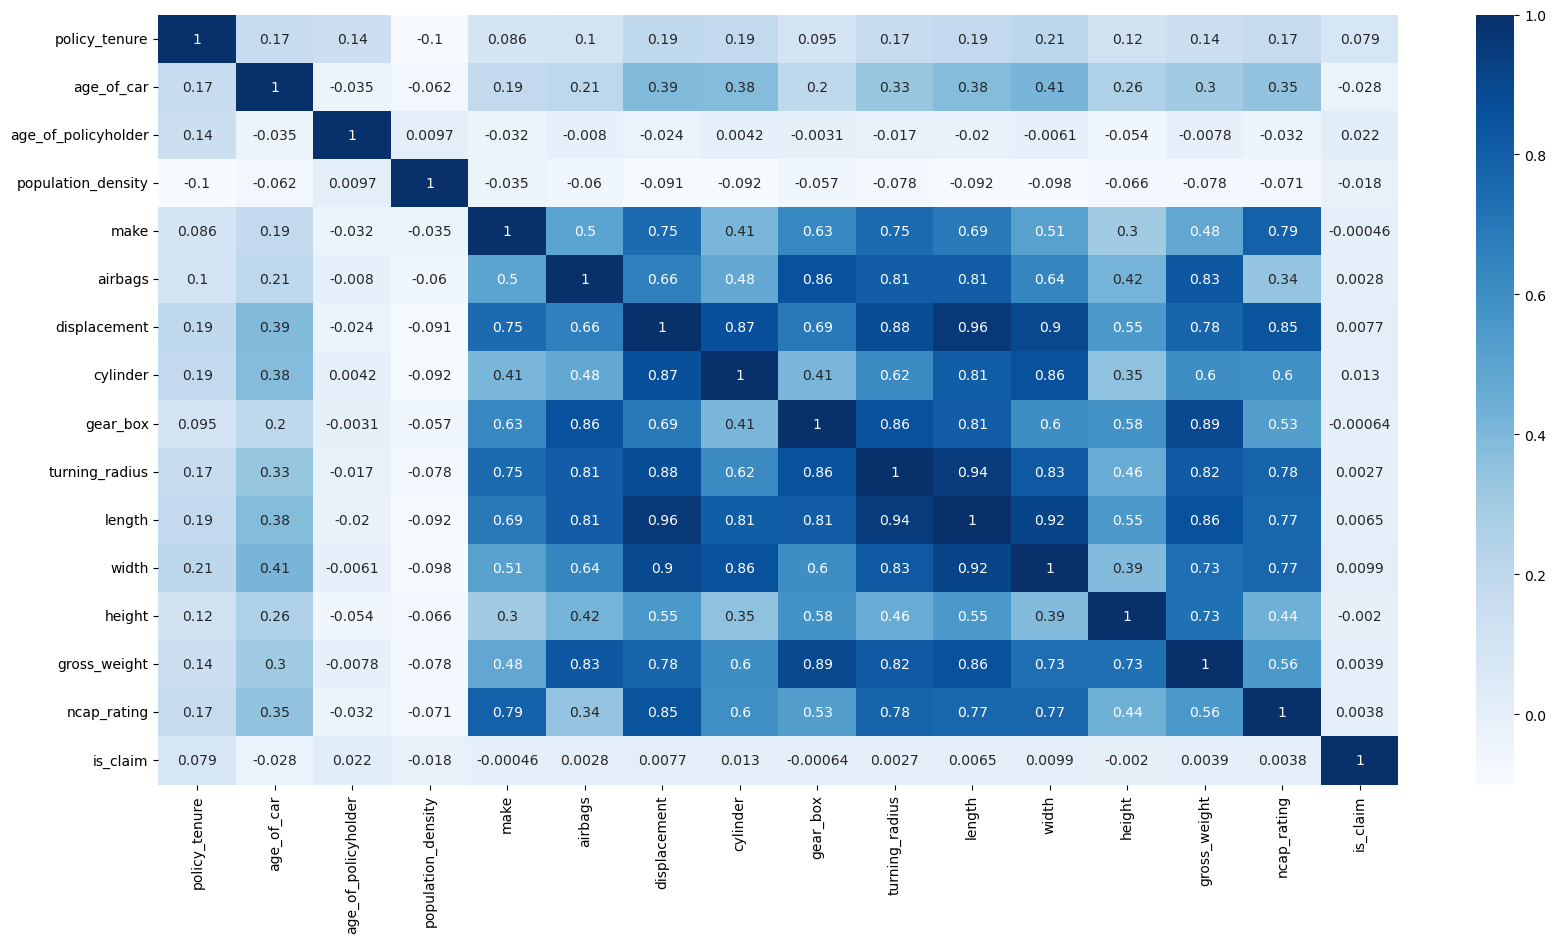

In [31]:
corr_matrix=numeric_columns.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap='Blues', annot= True,)
plt.show()

# Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col,value in cat_col:
    df[col] = le.fit_transform(df[col])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  int32  
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  int32  
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  int32  
 8   model                             58592 non-null  int32  
 9   fuel_type                         58592 non-null  int32  
 10  max_torque                        58592 non-null  int32  
 11  max_power                         58592 non-null  int32  
 12  engi

In [34]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

# Data Segregation (feature: target)

In [35]:
x= df.drop(['policy_id','is_claim'],axis=1)
y= df['is_claim']

# Imbalance Treatment using imblearn

In [36]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_ov, y_ov =smote.fit_resample(x,y)

is_claim
0    54844
1     3748
Name: count, dtype: int64 
 is_claim
0    54844
1    54844
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'After SMOTE')

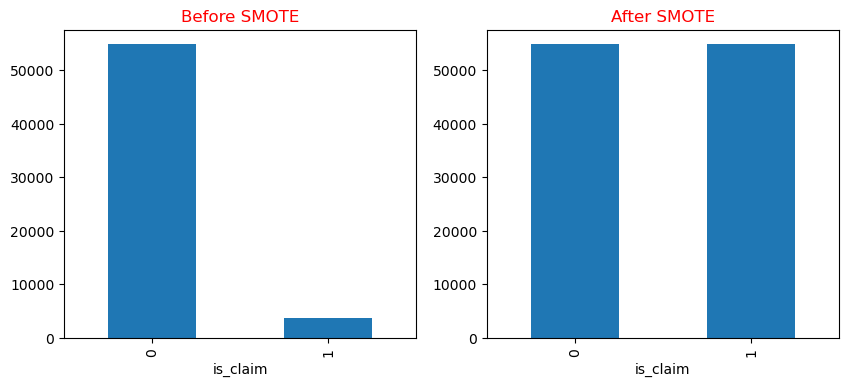

In [37]:
print(y.value_counts(),'\n', y_ov.value_counts())
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
y.value_counts().plot(kind='bar')
plt.title('Before SMOTE', color='r')
plt.subplot(1,2,2)
y_ov.value_counts().plot(kind='bar')
plt.title('After SMOTE',color='r')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

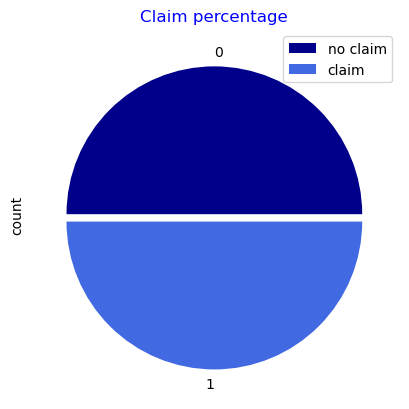

In [38]:
y_ov.value_counts().plot(kind='pie', explode=(0,0.05), colors=['darkblue','royalblue'])
plt.title('Claim percentage', color ='blue')
plt.legend(['no claim','claim'])
plt.show()

# Train - Test Splitting

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
xtrain_ov, xtest_ov, ytrain_ov, ytest_ov = train_test_split(x_ov,y_ov, test_size=0.2, random_state=142, stratify=y_ov)

# Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_ov = sc.fit_transform(xtrain_ov)
xtest_ov = sc.transform(xtest_ov)

In [42]:
pd.value_counts(ytest_ov)

<IPython.core.display.Javascript object>

is_claim
1    10969
0    10969
Name: count, dtype: int64

# Building Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

rfc= RandomForestClassifier(n_estimators=100, random_state=142)
xgb = XGBClassifier(random_state=142)

In [44]:
models=[('Random Forest', rfc),('XGBoost',xgb)]  

# Model training and Evaluation

Random Forest
Training accuracy : 0.999988603988604
Testing accuracy : 0.918771082140578
Training Accuracy after Cross Validation: 0.91
[[10023   946]
 [  836 10133]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     10969
           1       0.91      0.92      0.92     10969

    accuracy                           0.92     21938
   macro avg       0.92      0.92      0.92     21938
weighted avg       0.92      0.92      0.92     21938



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

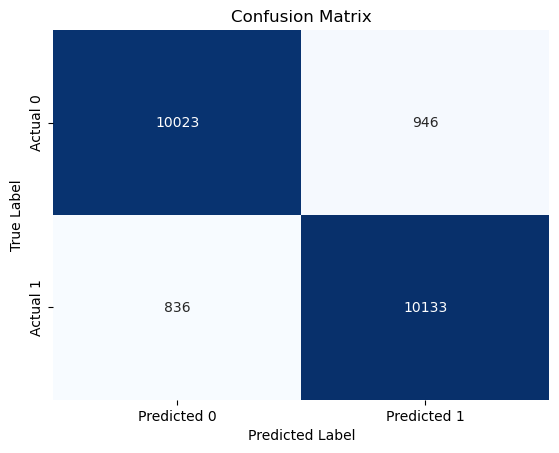

XGBoost
Training accuracy : 0.9628262108262108
Testing accuracy : 0.9582915489105661
Training Accuracy after Cross Validation: 0.96
[[10945    24]
 [  891 10078]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10969
           1       1.00      0.92      0.96     10969

    accuracy                           0.96     21938
   macro avg       0.96      0.96      0.96     21938
weighted avg       0.96      0.96      0.96     21938



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

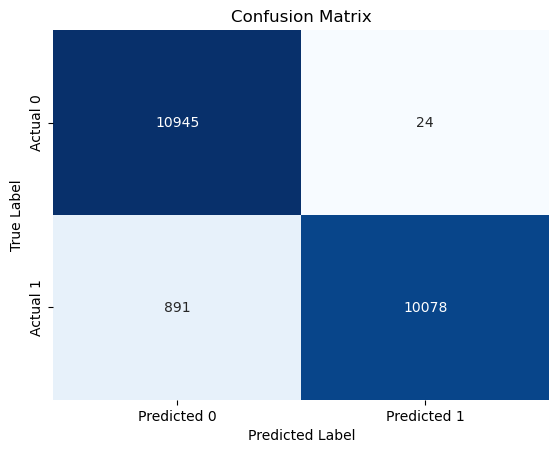

In [45]:

for model_name, model in models:
    model.fit(xtrain_ov, ytrain_ov)
    y_pred_train = model.predict(xtrain_ov)
    y_pred_test = model.predict(xtest_ov)
    print('==='*10)
    print(model_name)
    print('==='*10)
    acc_train= accuracy_score(ytrain_ov, y_pred_train)
    acc_test= accuracy_score(ytest_ov, y_pred_test)
    print(f'Training accuracy : {acc_train}')
    print(f'Testing accuracy : {acc_test}')
    cv_train = (cross_val_score(model, xtrain_ov, ytrain_ov, cv=10).mean()).round(2)
    print('Training Accuracy after Cross Validation:', cv_train)
    cm_test = confusion_matrix(ytest_ov,y_pred_test)
    print(cm_test)
    print(classification_report(ytest_ov,y_pred_test))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# ROC- AUC Curve

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

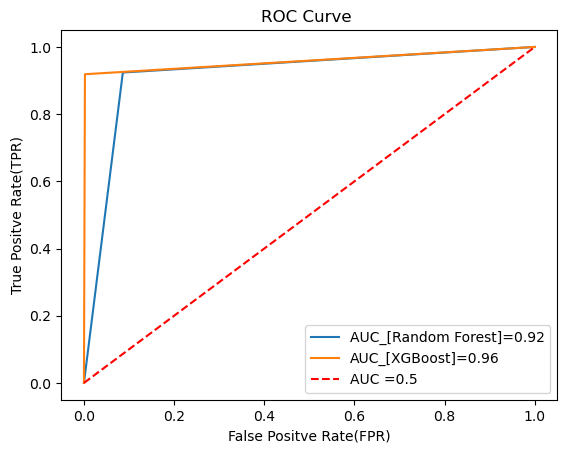

In [47]:
for model_name, model in models:
    model.fit(xtrain_ov, ytrain_ov)
    y_pred_train = model.predict(xtrain_ov)
    y_pred_test = model.predict(xtest_ov)
    fpr, tpr, _ = roc_curve(ytest_ov,y_pred_test)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr, label =f'AUC_[{model_name}]={roc_auc.round(2)}')
plt.plot([0,1],[0,1], 'r--', label='AUC =0.5')
plt.xlabel('False Positve Rate(FPR)')
plt.ylabel('True Positve Rate(TPR)')
plt.title('ROC Curve ')
plt.legend(loc='lower right')
plt.show()

In [48]:
f_indx = []
f_name= []
feature_details = {i:v for i,v in enumerate(x.columns)}
print(feature_details)
for i,v in feature_details.items():
    f_indx.append(i)
    f_name.append(v)
feature_names = f_name

{0: 'policy_tenure', 1: 'age_of_car', 2: 'age_of_policyholder', 3: 'area_cluster', 4: 'population_density', 5: 'make', 6: 'segment', 7: 'model', 8: 'fuel_type', 9: 'max_torque', 10: 'max_power', 11: 'engine_type', 12: 'airbags', 13: 'is_esc', 14: 'is_adjustable_steering', 15: 'is_tpms', 16: 'is_parking_sensors', 17: 'is_parking_camera', 18: 'rear_brakes_type', 19: 'displacement', 20: 'cylinder', 21: 'transmission_type', 22: 'gear_box', 23: 'steering_type', 24: 'turning_radius', 25: 'length', 26: 'width', 27: 'height', 28: 'gross_weight', 29: 'is_front_fog_lights', 30: 'is_rear_window_wiper', 31: 'is_rear_window_washer', 32: 'is_rear_window_defogger', 33: 'is_brake_assist', 34: 'is_power_door_locks', 35: 'is_central_locking', 36: 'is_power_steering', 37: 'is_driver_seat_height_adjustable', 38: 'is_day_night_rear_view_mirror', 39: 'is_ecw', 40: 'is_speed_alert', 41: 'ncap_rating'}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

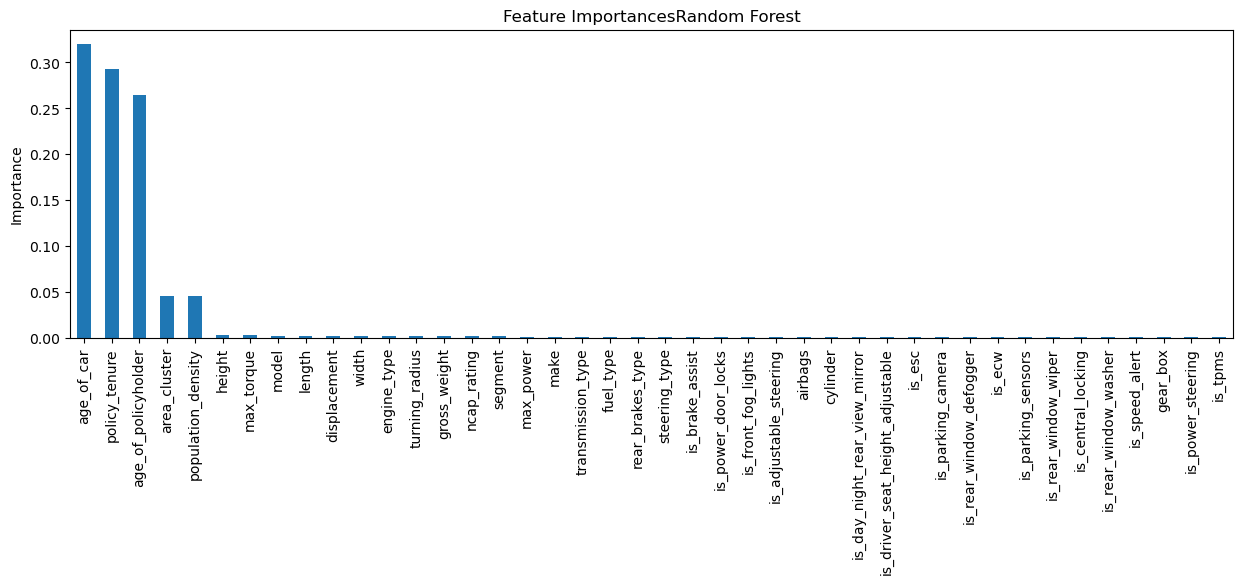

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

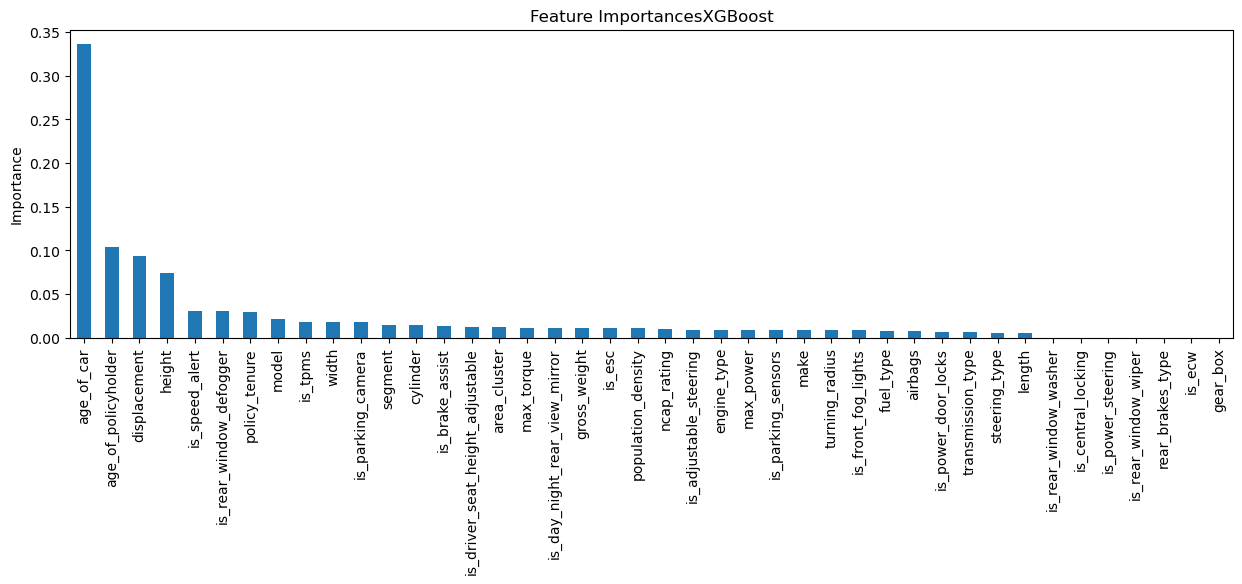

In [49]:
for model_name, model in models:
    model.fit(xtrain_ov, ytrain_ov)
    y_pred_train = model.predict(xtrain_ov)
    y_pred_test = model.predict(xtest_ov)
    importances = model.feature_importances_


    feature_importances = pd.Series(importances, index=feature_names)


    fig, ax = plt.subplots(figsize=(15,4))
    feature_importances.sort_values(ascending=False).plot(kind='bar', ax=ax)
    plt.title(f"Feature Importances{model_name}")
    plt.ylabel("Importance")
    plt.show()



In [50]:
#shap
!pip install shap


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import shap
shap.initjs()

In [52]:
# print('Random Forest')
# rfc.fit(xtrain_ov, ytrain_ov)
# explainer = shap.Explainer(rfc)
# shap_values =explainer(xtrain_ov)
# shap.plots.waterfall(shap_values[0])
# shap.plots.bar(shap_values)
# shap.plots.beeswarm(shap_values)


XGBoost


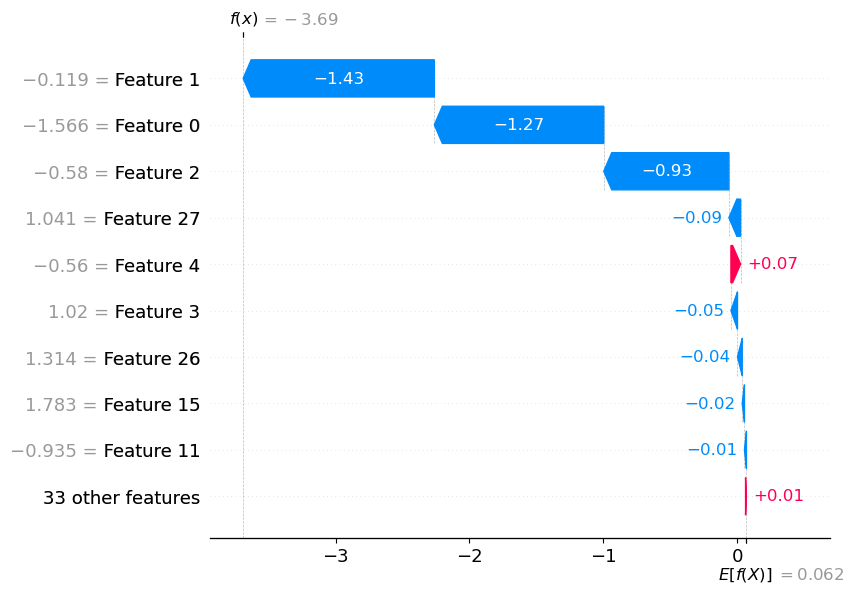

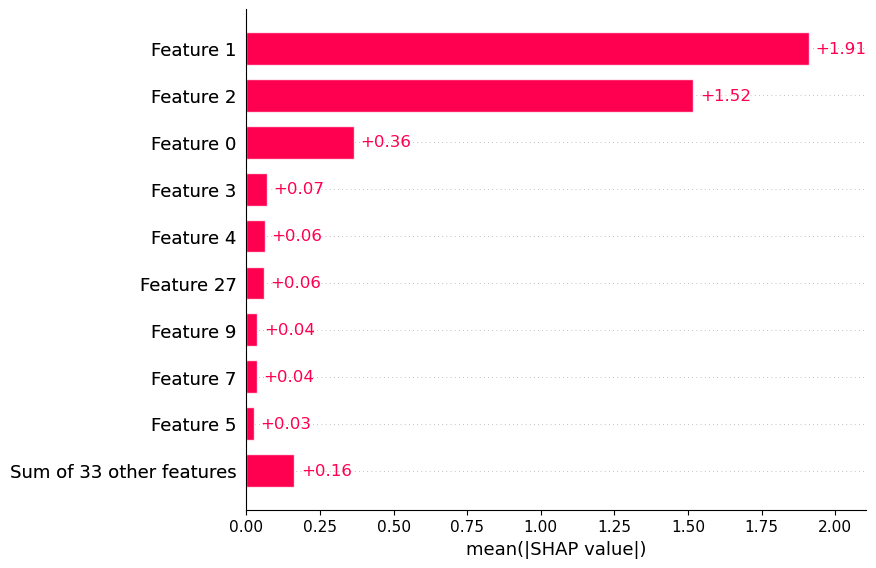

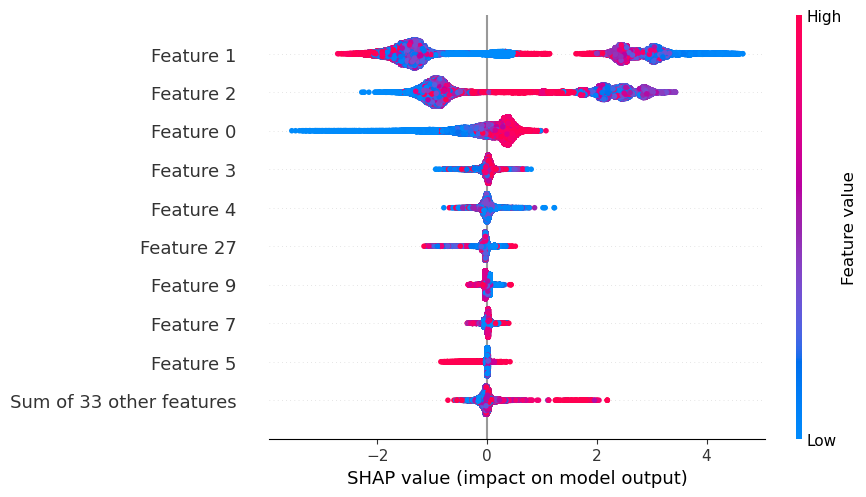

In [53]:
print('XGBoost')
xgb.fit(xtrain_ov, ytrain_ov)
explainer = shap.Explainer(xgb)
shap_values =explainer(xtrain_ov)
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)


# **After Feature Selection :**

Random Forest with 5 features
Training accuracy : 0.999988603988604
Testing accuracy : 0.9392378521287265
Training Accuracy after Cross Validation: 0.94
[[10519   450]
 [  883 10086]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10969
           1       0.96      0.92      0.94     10969

    accuracy                           0.94     21938
   macro avg       0.94      0.94      0.94     21938
weighted avg       0.94      0.94      0.94     21938



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

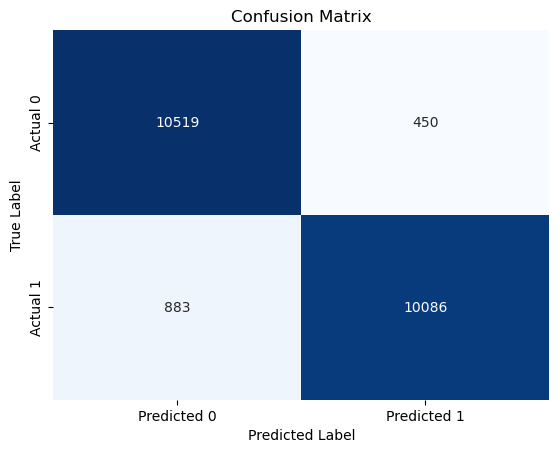

In [54]:
x_rfc = x_ov[['policy_tenure', 'age_of_car','age_of_policyholder','area_cluster','height']]

y_rfc = y_ov
xr_train,xr_test,ytrain,ytest = train_test_split(x_rfc,y_rfc, test_size=0.2, random_state=142, stratify=y_rfc)

rfc.fit(xr_train, ytrain)
y_pred_train = rfc.predict(xr_train)
y_pred_test = rfc.predict(xr_test)
print('==='*10)
print('Random Forest with 5 features')
print('==='*10)
acc_train= accuracy_score(ytrain, y_pred_train)
acc_test= accuracy_score(ytest, y_pred_test)
print(f'Training accuracy : {acc_train}')
print(f'Testing accuracy : {acc_test}')
cv_train = (cross_val_score(rfc, xr_train, ytrain, cv=10).mean()).round(2)
print('Training Accuracy after Cross Validation:', cv_train)
cm_test = confusion_matrix(ytest,y_pred_test)
print(cm_test)
print(classification_report(ytest,y_pred_test))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
x_xgb = x_ov[['age_of_car','age_of_policyholder',]]#'height','rear_brakes_type']] 
y_xgb = y_ov
xx_train,xx_test,ytrain,ytest = train_test_split(x_xgb,y_xgb, test_size=0.2, random_state=142, stratify=y_xgb)
xgb.fit(xx_train, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=142, ...)

XG Boost with 2 features
Training accuracy : 0.9601937321937322
Testing accuracy : 0.9569696417175677
Training Accuracy after Cross Validation: 0.96
[[10969     0]
 [  944 10025]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10969
           1       1.00      0.91      0.96     10969

    accuracy                           0.96     21938
   macro avg       0.96      0.96      0.96     21938
weighted avg       0.96      0.96      0.96     21938



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

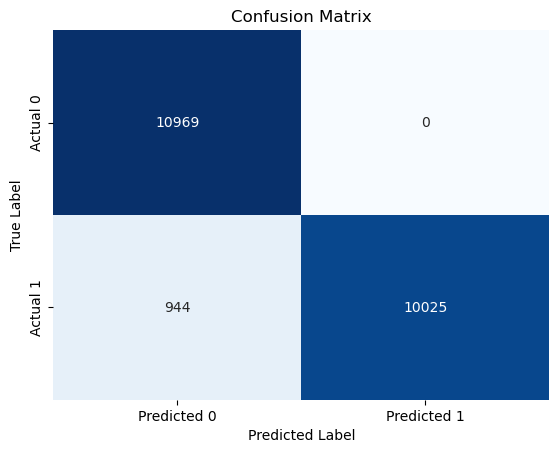

In [56]:

y_pred_train = xgb.predict(xx_train)
y_pred_test = xgb.predict(xx_test)
print('==='*10)
print(f'XG Boost with {x_xgb.shape[1]} features')
print('==='*10)
acc_train= accuracy_score(ytrain, y_pred_train)
acc_test= accuracy_score(ytest, y_pred_test)
print(f'Training accuracy : {acc_train}')
print(f'Testing accuracy : {acc_test}')
cv_train = (cross_val_score(xgb, xx_train, ytrain, cv=10).mean()).round(2)
print('Training Accuracy after Cross Validation:', cv_train)
cm_test = confusion_matrix(ytest,y_pred_test)
print(cm_test)
print(classification_report(ytest,y_pred_test))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()